In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Target variable
train['SalePrice'].head(10)

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

In [6]:
train['SalePrice'].isnull().sum()

0

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

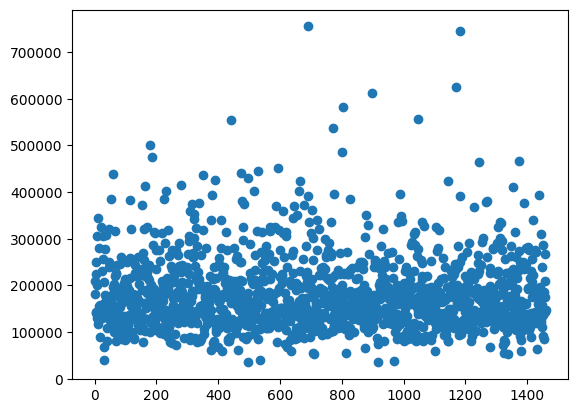

In [8]:
#Target variable - Outliers
plt.scatter(x=train['Id'], y=train['SalePrice'])

<AxesSubplot: xlabel='SalePrice'>

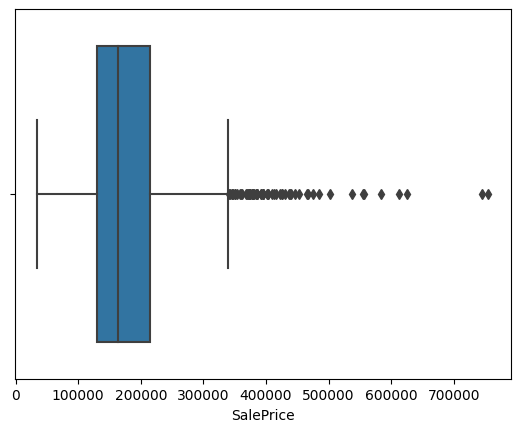

In [9]:
sns.boxplot(x=train['SalePrice'])

In [10]:
q1 = train['SalePrice'].quantile(0.25)
q3 = train['SalePrice'].quantile(0.75)
iqr = q3-q1

In [11]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit, lower_limit

(340037.5, 3937.5)

In [12]:
def limit_imputer(val):
    if val > upper_limit:
        return upper_limit
    if val < lower_limit:
        return lower_limit
    else:
        return val

In [13]:
train['SalePrice'] = train['SalePrice'].apply(limit_imputer)

In [14]:
train['SalePrice'].describe()

count      1460.000000
mean     177331.526370
std       67205.835915
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      340037.500000
Name: SalePrice, dtype: float64

In [15]:
#Train data-missing values
for i in train.columns:
  tmp = train[i].isnull().sum()/len(train)
  if tmp > 0.70:
    print("Removing column '"+i+"' with missing value ratio", tmp)
    data = train.drop(columns = [i])

Removing column 'Alley' with missing value ratio 0.9376712328767123
Removing column 'PoolQC' with missing value ratio 0.9952054794520548
Removing column 'Fence' with missing value ratio 0.8075342465753425
Removing column 'MiscFeature' with missing value ratio 0.963013698630137


In [16]:
sum(train.isna().any())

19

In [17]:
obj_col = list(train.select_dtypes(include='object').columns)
len(obj_col)

43

In [18]:
num_col = list(train.select_dtypes(exclude ='object').columns)
len(num_col)

38

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
train[num_col] = imputer.fit_transform(train[num_col])

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
train[obj_col] = imputer.fit_transform(train[obj_col])

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [22]:
train_id = train[['Id', 'SalePrice']]
train.drop(columns =['Id', 'SalePrice']).describe().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.9,69.86,10516.83,6.10,5.58,1971.27,1984.87,103.12,443.64,46.55,...,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82
std,42.3,22.03,9981.26,1.38,1.11,30.20,20.65,180.73,456.10,161.32,...,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,20.0,60.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,70.0,79.00,11601.50,7.00,6.00,2000.00,2004.00,164.25,712.25,0.00,...,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00


In [23]:
#Train data-outliers
data=train.drop(columns =['Id', 'SalePrice'])
for col in data.columns:
    if train[col].dtypes!='object':
        q1 = train[col].quantile(0.25)
        q3 = train[col].quantile(0.75)
        iqr = q3-q1
    
        upper = q3+1.5*iqr
        lower = q1-1.5*iqr
    
        median = data[col].median()
        newcol = []
        for val in data[col]:
            if val < lower or val > upper:
                newcol.append(median)
            else:
                newcol.append(val)
        data[col] = newcol

In [24]:
data.describe().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0,...,1460.00,1460.00,1460.00,1460.0,1460.0,1460.0,1460.0,1460.0,1460.00,1460.00
mean,48.38,68.79,9282.27,6.11,5.41,1971.72,1984.87,61.84,433.30,0.0,...,464.08,82.60,34.96,0.0,0.0,0.0,0.0,0.0,6.32,2007.82
std,28.16,13.85,3120.53,1.37,0.78,29.51,20.65,103.96,423.12,0.0,...,199.26,106.52,43.10,0.0,0.0,0.0,0.0,0.0,2.70,1.33
min,20.00,32.00,1491.00,2.00,4.00,1885.00,1950.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.00,2006.00
25%,20.00,60.00,7560.00,5.00,5.00,1954.00,1967.00,0.00,0.00,0.0,...,334.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.00,2007.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.25,0.0,...,480.00,0.00,25.00,0.0,0.0,0.0,0.0,0.0,6.00,2008.00
75%,60.00,75.00,11107.25,7.00,6.00,2000.00,2004.00,106.00,702.50,0.0,...,576.00,160.00,56.00,0.0,0.0,0.0,0.0,0.0,8.00,2009.00
max,120.00,107.00,17671.00,10.00,7.00,2010.00,2010.00,410.00,1767.00,0.0,...,936.00,418.00,170.00,0.0,0.0,0.0,0.0,0.0,12.00,2010.00


In [25]:
train = pd.concat([train_id, data], axis = 1)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   SalePrice      1460 non-null   float64
 2   MSSubClass     1460 non-null   float64
 3   MSZoning       1460 non-null   object 
 4   LotFrontage    1460 non-null   float64
 5   LotArea        1460 non-null   float64
 6   Street         1460 non-null   object 
 7   Alley          1460 non-null   object 
 8   LotShape       1460 non-null   object 
 9   LandContour    1460 non-null   object 
 10  Utilities      1460 non-null   object 
 11  LotConfig      1460 non-null   object 
 12  LandSlope      1460 non-null   object 
 13  Neighborhood   1460 non-null   object 
 14  Condition1     1460 non-null   object 
 15  Condition2     1460 non-null   object 
 16  BldgType       1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  OverallQ

In [27]:
#categorical variable
for col in obj_col:
    print(train[col].value_counts())
    print('.'*25)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
.........................
Pave    1454
Grvl       6
Name: Street, dtype: int64
.........................
Grvl    1419
Pave      41
Name: Alley, dtype: int64
.........................
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
.........................
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
.........................
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
.........................
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
.........................
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
.........................
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel  

In [28]:
#ordinal_categorical_variables
ord = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
#nominal_categorical_variables
nom = list(set(obj_col) - set(ord))

len(ord), len(nom)

(15, 30)

In [29]:
#Test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
#Test data-Missing values
for i in test.columns:
  tmp = test[i].isnull().sum()/len(test)
  if tmp > 0.70:
    print("Removing column '"+i+"' with missing value ratio", tmp)
    data = test.drop(columns = [i])

Removing column 'Alley' with missing value ratio 0.9266620973269363
Removing column 'PoolQC' with missing value ratio 0.997943797121316
Removing column 'Fence' with missing value ratio 0.8012337217272104
Removing column 'MiscFeature' with missing value ratio 0.9650445510623715


In [31]:
sum(test.isna().any())

33

In [32]:
obj_col = list(test.select_dtypes(include='object').columns)

In [33]:
num_col = list(test.select_dtypes(exclude ='object').columns)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
test[num_col] = imputer.fit_transform(test[num_col])

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
test[obj_col] = imputer.fit_transform(test[obj_col])

In [36]:
test.shape

(1459, 80)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   float64
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   float64
 18  OverallC

In [38]:
test.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,...,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00
mean,2190.00,57.38,68.33,9819.16,6.08,5.55,1971.36,1983.66,99.67,439.14,...,472.77,93.17,48.31,24.24,1.79,17.06,1.74,58.17,6.10,2007.77
std,421.32,42.75,20.57,4955.52,1.44,1.11,30.39,21.13,177.00,455.12,...,216.97,127.74,68.88,67.23,20.21,56.61,30.49,630.81,2.72,1.30
min,1461.00,20.00,21.00,1470.00,1.00,1.00,1879.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,1825.50,20.00,60.00,7391.00,5.00,5.00,1953.00,1963.00,0.00,0.00,...,318.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,2190.00,50.00,67.00,9399.00,6.00,5.00,1973.00,1992.00,0.00,350.50,...,480.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,2554.50,70.00,78.00,11517.50,7.00,6.00,2001.00,2004.00,162.00,752.00,...,576.00,168.00,72.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,2919.00,190.00,200.00,56600.00,10.00,9.00,2010.00,2010.00,1290.00,4010.00,...,1488.00,1424.00,742.00,1012.00,360.00,576.00,800.00,17000.00,12.00,2010.00


In [39]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [40]:
train_test = pd.concat([train.drop('SalePrice', axis= 1),test],axis=0)

In [41]:
train_test.shape

(2919, 80)

In [42]:
#ordinal variable encding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for c in ord:
    train_test[c] = label_encoder.fit_transform(train_test[c])

In [43]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   float64
 1   MSSubClass     2919 non-null   float64
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   float64
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   float64
 18  OverallC

In [44]:
train_test = train_test.drop("Id", axis=1)

In [45]:
#dummie
train_test_data = pd.get_dummies(train_test, columns = nom)

In [46]:
train_test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,2,4,...,0,1,0,0,0,0,1,0,0,0
1,20.0,80.0,9600.0,6.0,5.0,1976.0,1976.0,0.0,3,4,...,0,0,0,0,0,1,0,0,0,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,2,4,...,0,1,0,0,0,0,1,0,0,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,3,4,...,0,1,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,2,4,...,0,1,0,0,0,0,1,0,0,0


In [47]:
train_test_data.shape

(2919, 241)

In [48]:
train_test_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
MSSubClass,1.000000,-0.362555,-0.313334,0.079558,-0.075152,0.061713,0.060753,0.015746,-0.046106,0.012360,...,0.062005,0.301967,0.184918,0.163429,0.008055,-0.107762,0.095488,0.002480,0.033481,0.021724
LotFrontage,-0.362555,1.000000,0.502820,0.187110,-0.073642,0.134619,0.077889,0.214451,-0.156310,0.020407,...,-0.028688,-0.014477,-0.016326,0.057061,-0.149284,0.030944,0.064064,0.003857,-0.020163,-0.008423
LotArea,-0.313334,0.502820,1.000000,0.151354,-0.069797,0.067960,0.048030,0.169407,-0.114983,-0.017842,...,0.034434,-0.042318,-0.051266,0.032232,-0.096457,0.025213,0.032534,0.014135,-0.013226,0.002874
OverallQual,0.079558,0.187110,0.151354,1.000000,-0.132899,0.606700,0.570098,0.363952,-0.640511,0.162409,...,0.031845,0.245518,-0.087647,-0.017691,-0.188121,-0.411702,0.567455,-0.153021,-0.023974,0.009076
OverallCond,-0.075152,-0.073642,-0.069797,-0.132899,1.000000,-0.346336,-0.031806,-0.120997,0.216169,-0.164159,...,0.052778,-0.064667,0.025331,0.029636,0.136732,0.198361,-0.282995,-0.021399,0.056237,-0.003620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foundation_CBlock,-0.107762,0.030944,0.025213,-0.411702,0.198361,-0.291002,-0.430164,-0.039511,0.411467,-0.089084,...,-0.054936,-0.236241,0.091297,0.111226,-0.295726,1.000000,-0.771647,-0.111897,-0.052670,-0.035473
Foundation_PConc,0.095488,0.064064,0.032534,0.567455,-0.282995,0.653080,0.590399,0.163221,-0.516186,0.187813,...,-0.051527,0.266791,-0.054677,-0.058393,-0.311159,-0.771647,1.000000,-0.117737,-0.055419,-0.037325
Foundation_Slab,0.002480,0.003857,0.014135,-0.153021,-0.021399,-0.055791,-0.110281,-0.049825,0.053162,-0.009416,...,-0.011897,-0.044499,-0.006310,-0.014959,-0.045121,-0.111897,-0.117737,1.000000,-0.008036,-0.005412
Foundation_Stone,0.033481,-0.020163,-0.013226,-0.023974,0.056237,-0.112591,-0.023796,-0.033944,-0.006667,-0.027445,...,-0.005600,0.057585,-0.010522,-0.013171,-0.021239,-0.052670,-0.055419,-0.008036,1.000000,-0.002548


In [49]:
#splitting data
from sklearn.model_selection import train_test_split
X = train_test_data.iloc[0:1460]
Y = train['SalePrice']

In [50]:
test_data = train_test_data.iloc[1460:]

In [51]:
X.shape, Y.shape, test_data.shape

((1460, 241), (1460,), (1459, 241))

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [53]:
Y_train.shape

(1095,)

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, Y_train)
Y_pred = model_DTR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))

0.1434769863226589


In [55]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))

0.10256729704526213


In [56]:
from sklearn import svm
from sklearn.svm import SVC

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred))

0.33840083139870747


In [57]:
pred_DTR = model_DTR.predict(test_data)

In [58]:
res_DTR = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred_DTR})
res_DTR['Id'] = res_DTR['Id'].astype(int)

In [59]:
res_DTR.head(20)

,Id,SalePrice
0,1461,108000.0
1,1462,136000.0
2,1463,231500.0
3,1464,185000.0
4,1465,212000.0
5,1466,190000.0
6,1467,143500.0
7,1468,174000.0
8,1469,194500.0
9,1470,94750.0


In [60]:
pred_RFR = model_RFR.predict(test_data)

In [61]:
res_RFR = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred_RFR})
res_RFR['Id'] = res_RFR['Id'].astype(int)

In [62]:
res_RFR.head(20)

,Id,SalePrice
0,1461,122357.500
1,1462,157970.320
2,1463,185943.000
3,1464,186608.500
4,1465,199688.040
5,1466,182029.720
6,1467,172674.230
7,1468,175283.740
8,1469,184053.130
9,1470,114036.330


In [63]:
pred_SVR = model_SVR.predict(test_data).round(4)

In [64]:
res_SVR = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred_SVR})
res_SVR['Id'] = res_SVR['Id'].astype(int)

In [65]:
res_SVR.head(20)

,Id,SalePrice
0,1461,165090.5603
1,1462,165081.0511
2,1463,165121.5771
3,1464,165071.4143
4,1465,165005.0443
5,1466,165071.2955
6,1467,165039.8150
7,1468,165045.9090
8,1469,165074.1168
9,1470,165042.6346
